In [274]:
import datetime
import pandas as pd
from datetime import datetime
import numpy as np
import seaborn
import matplotlib.pyplot as plt

In [299]:
EVENTS = {
    "АБОРТ": 1,
    "БОЛЕЗНЬ": 2,
    "ВАКВИРУС": 3,
    "ВАКЦИН": 4,
    "ВЕС": 5,
    "ДЕФЕКТ": 6,
    "ЗДОРОВА": 7,
    "КЕТОЗ": 8,
    "МАСТИТ": 9,
    "МЕТРИТ": 10,
    "НА_СХЕМУ": 11,
    "НЕОСЕМ": 12,
    "ОСЕМЕН": 13,
    "ОТЕЛ": 14,
    "ПАЛА": 15,
    "ПАРЕЗ": 16,
    "ПЕРЕВОД": 17,
    "ПОСЛЕД": 18,
    "ПРОДАНА": 19,
    "ПРОФОТ": 20,
    "РАСЧКОП": 21,
    "СО_СХЕМЫ": 22,
    "СТЕЛН": 23,
    "СТЕЛНДО": 24,
    "СУХ2": 25,
    "СУХОСТ": 26,
    "ХРОМОТА": 27,
    "ЯЛОВАЯ": 28
}
events = dict(map(lambda n: (n[1], n[0]), EVENTS.items()))

In [340]:
df = pd.read_csv('data_with_num_events.csv')

In [331]:
df = pd.read_csv('data_with_num_events.csv')
df['Дата рождения'] = pd.to_datetime(df['Дата рождения'], format='%m/%d/%Y')
df['Дата события'] = pd.to_datetime(df['Дата события'], format='%m/%d/%Y')
df['Возраст'] = (df['Дата события'] - df['Дата рождения']).dt.days
df['Возраст_месяцев'] = df['Возраст'].apply(lambda n: int(n // 30.5))
del df['Возраст']
df['Был отел'] = df['Результат отела'].apply(lambda n: 0 if str(n) == 'nan' else 1)
df['Результат отела (живой или нет детей/мертвый)'] = df['Результат отела'].apply(lambda n: 1 if 'A' in str(n) or str(n) == 'nan' else 1)
df['Результат отела (двойня)'] = df['Результат отела'].apply(lambda n: 1 if len(str(n)) == 4  else 0)
df['Результат отела (разнополая двойня)'] = df['Результат отела'].apply(lambda n: 1 if len(str(n)) == 4 and str(n).count('A') == 1  else 0)
del df['Результат отела']
df = df[df.Возраст_месяцев >= 3]
df = df[df.Пол == 'F']
del df['Пол']
df = df.dropna()
del df['Ушная бирка животного']
del df['Дата рождения']
del df['Дата события']
del df['Unnamed: 0']
del df['Примечание события']
del df['Номер группы животного']
del df['Предыдущий номер группы животного']

cows_numbers = df['Номер животного'].unique()
columns = list(filter(lambda n: n != 'Событие', list(df.columns)))
new_columns = list(map(lambda n: events[n], list(range(1, 29))))
all_columns = columns + new_columns

new_df = pd.DataFrame(columns=all_columns)
for cow in cows_numbers:
    data_row = []
    df_2 = df[df['Номер животного'] == cow]
    for column in columns:
        data_row.append(int(sum(list(df_2[column]))/len(list(df_2[column]))))
    for new_column in new_columns:
        data_row.append(list(df_2['Событие']).count(EVENTS[new_column]))
    new_df.loc[len(new_df.index)] = data_row

In [333]:
new_df['healthy'] = new_df['ЗДОРОВА'].apply(lambda n: 1 if n !=0 else 0)
new_df['dead_or_sell'] = new_df['ПАЛА']+new_df['ПРОДАНА']
del new_df['ЗДОРОВА']
del new_df['ПАЛА']
del new_df['ПРОДАНА']
#str_columns = list(map(lambda n: str(n), list(new_df.columns)))
#zip_str_columns = dict(zip(list(new_df.columns), str_columns))
#new_df = new_df.rename(zip_str_columns)

In [334]:
new_df

,Номер животного,Номер лактации,Легкость отела,Дней в сухостое предыдущей лактации,Дней стельности при событии,Дни доения при событии,Возраст_месяцев,Был отел,Результат отела (живой или нет детей/мертвый),Результат отела (двойня),...,РАСЧКОП,СО_СХЕМЫ,СТЕЛН,СТЕЛНДО,СУХ2,СУХОСТ,ХРОМОТА,ЯЛОВАЯ,healthy,dead_or_sell
0,401112,7,1,67,0,0,101,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,402155,6,1,56,0,11,100,1,1,0,...,1,0,0,0,0,0,0,0,0,0
2,402186,5,1,50,0,603,100,1,1,0,...,1,0,0,0,0,0,2,0,0,1
3,403230,6,1,59,222,291,99,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,406125,6,1,70,143,277,96,1,1,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534,22740,0,0,0,0,92,3,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3535,22741,0,0,0,0,92,3,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3536,22742,0,0,0,0,92,3,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3537,22743,0,0,0,0,92,3,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [335]:
train_df = new_df.copy()
val_df = new_df.copy()
train_df = train_df.query("`healthy` == 1 or `dead_or_sell` == 1")
val_df = val_df.query("`healthy` == 0 and `dead_or_sell` == 0")
print(len(val_df), len(train_df))

2913 626


In [319]:
train_df['healthy_deadsell'] = train_df['healthy']
del train_df['healthy']
del train_df['dead_or_sell']
del train_df['Номер животного']
del val_df['healthy']
del val_df['dead_or_sell']
del val_df['Номер животного']

In [339]:
val_df

,Номер животного,Номер лактации,Легкость отела,Дней в сухостое предыдущей лактации,Дней стельности при событии,Дни доения при событии,Возраст_месяцев,Был отел,Результат отела (живой или нет детей/мертвый),Результат отела (двойня),...,РАСЧКОП,СО_СХЕМЫ,СТЕЛН,СТЕЛНДО,СУХ2,СУХОСТ,ХРОМОТА,ЯЛОВАЯ,healthy,dead_or_sell
0,401112,7,1,67,0,0,101,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,402155,6,1,56,0,11,100,1,1,0,...,1,0,0,0,0,0,0,0,0,0
3,403230,6,1,59,222,291,99,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,406125,6,1,70,143,277,96,1,1,0,...,0,0,1,0,0,0,0,0,0,0
5,407041,6,1,66,68,170,96,1,1,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534,22740,0,0,0,0,92,3,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3535,22741,0,0,0,0,92,3,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3536,22742,0,0,0,0,92,3,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3537,22743,0,0,0,0,92,3,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [320]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
y = train_df['healthy_deadsell']
X = train_df.drop('healthy_deadsell', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
reg_log = LogisticRegression(solver='lbfgs', max_iter=1000)
reg_log.fit(X_train, y_train)
y_pred = reg_log.predict(X_test)

from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.62      0.63        71
           1       0.81      0.82      0.81       136

    accuracy                           0.75       207
   macro avg       0.73      0.72      0.72       207
weighted avg       0.75      0.75      0.75       207



In [321]:
from sklearn.ensemble import RandomForestClassifier
reg_rf = RandomForestClassifier()
reg_rf.fit(X_train, y_train)
y_pred = reg_rf.predict(X_test)

In [322]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.75      0.79        71
           1       0.88      0.93      0.90       136

    accuracy                           0.86       207
   macro avg       0.86      0.84      0.85       207
weighted avg       0.86      0.86      0.86       207



In [327]:
feature_df = pd.DataFrame({'Importance':reg_rf.feature_importances_, 'Features': X_train.columns })
feature_df

,Importance,Features
0,0.046139,Номер лактации
1,0.031414,Легкость отела
2,0.046817,Дней в сухостое предыдущей лактации
3,0.069196,Дней стельности при событии
4,0.204799,Дни доения при событии
5,0.119536,Возраст_месяцев
6,0.026886,Был отел
7,0.000000,Результат отела (живой или нет детей/мертвый)
8,0.003351,Результат отела (двойня)
9,0.000000,Результат отела (разнополая двойня)


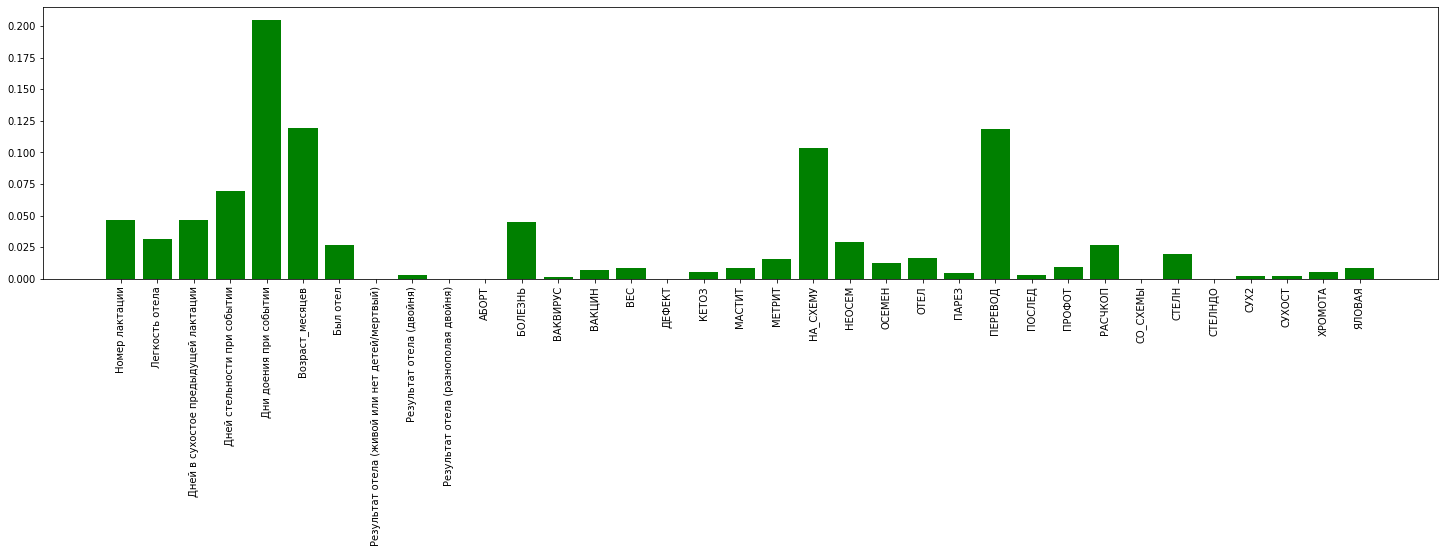

In [326]:
plt.figure(figsize=(25,5))
plt.bar(list(feature_df['Features']), list(feature_df['Importance']), color='g')

ax = plt.gca()
ax.tick_params(axis='x', labelrotation = 90)